# Importing the libraries

In [68]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

# Replicating the given model

* Input shape: (2)
* Hidden layers: 5 layers with *relu* as activation function. Each layer has 6 neurons
* Output: since it is a binary classification function the output will be 1 with sigmoid as activation function
* Loss function: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

In [6]:
#Setting the random seed
tf.random.set_seed(42)

#Replicating the model
replicate_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((2, )),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

replicate_model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

In [7]:
# Checking the summary of the model
replicate_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 18        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 6)                 42        
                                                                 
 dense_16 (Dense)            (None, 6)                 42        
                                                                 
 dense_17 (Dense)            (None, 6)                 42        
                                                                 
 dense_18 (Dense)            (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable 

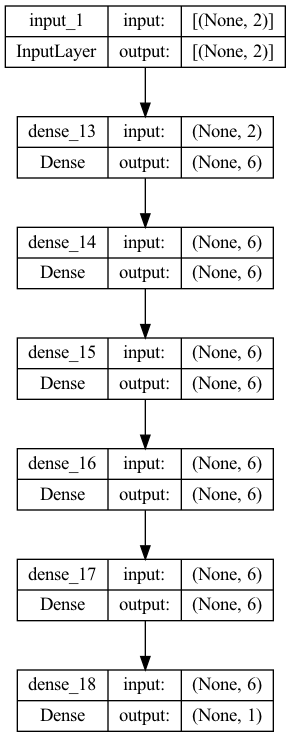

In [9]:
plot_model(replicate_model, show_shapes= True)

# Creating dataset for classifcation

In [22]:
X, y = make_moons(n_samples= 10000,
                  shuffle= True,
                  noise= 0.03,
                  random_state= 42)
X.shape, y.shape

((10000, 2), (10000,))

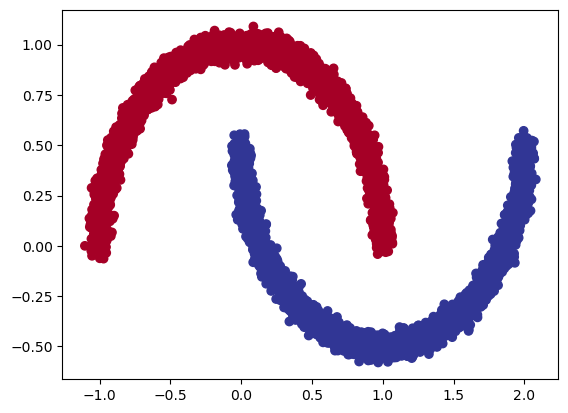

In [23]:
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= plt.cm.RdYlBu)

# Creating a decision bounadry and confusion matrix function for easy visualisation of the model performance

In [31]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.8)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [41]:
def plot_confusion_matrix(y_true, y_pred, classes= False, figsize= (10, 10), text_size= 15):
    '''
    Try it out by yourself by using y_true and y_pred as the parameters
    '''
    #Xreate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's pretify it
    fig, ax = plt.subplots(figsize= figsize)

    cax = ax.matshow(cm, cmap= plt.cm.Blues)
    fig.colorbar(cax)

    #Create classes

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #Label the axes
    ax.set(title= "Comnfusion Matrix",
        xlabel= "Predicted Label",
        ylabel= "True Label",
        xticks= np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels= labels,
        yticklabels= labels) 

    # Set axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2

    #Plot the tect on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment= "center", 
                color= "white" if cm[i, j] > threshold else "black",
                size= text_size)


# Splitting the data into training and test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [28]:
#Checking the shape of the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

# Creating model to classify the dataset

In [35]:
#Set the initial seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_1 = model_1.fit(X_train, y_train,
            epochs= 100,
            validation_data= (X_test, y_test))

Epoch 1/100
250/250 [==============================] - 0s 631us/step - loss: 0.6341 - accuracy: 0.6635 - val_loss: 0.5902 - val_accuracy: 0.6420
Epoch 2/100
250/250 [==============================] - 0s 413us/step - loss: 0.5663 - accuracy: 0.6496 - val_loss: 0.5294 - val_accuracy: 0.6855
Epoch 3/100
250/250 [==============================] - 0s 396us/step - loss: 0.5179 - accuracy: 0.6851 - val_loss: 0.4851 - val_accuracy: 0.7210
Epoch 4/100
250/250 [==============================] - 0s 399us/step - loss: 0.4823 - accuracy: 0.7147 - val_loss: 0.4518 - val_accuracy: 0.7445
Epoch 5/100
250/250 [==============================] - 0s 396us/step - loss: 0.4551 - accuracy: 0.7343 - val_loss: 0.4256 - val_accuracy: 0.7645
Epoch 6/100
250/250 [==============================] - 0s 396us/step - loss: 0.4331 - accuracy: 0.7485 - val_loss: 0.4041 - val_accuracy: 0.7845
Epoch 7/100
250/250 [==============================] - 0s 397us/step - loss: 0.4147 - accuracy: 0.7634 - val_loss: 0.3859 - val_ac

# Visualising the model performance

Graphs:
* Decision boundary
* Loss and Accuracy curve
* Confusion Matrix

## Decision Boundary

319/319 [==============================] - 0s 252us/step
doing binary classification


Text(0.5, 1.0, 'Model Prediction Decision boundary')

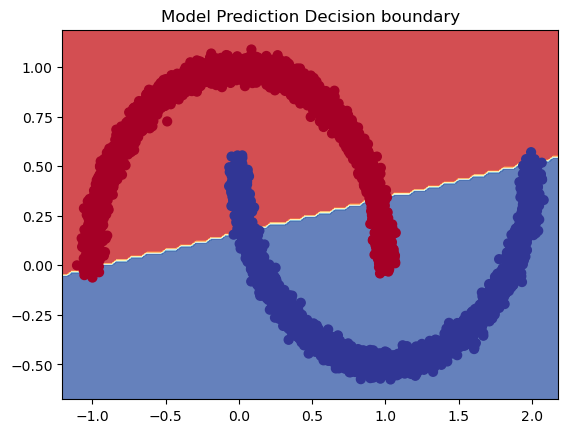

In [36]:
plot_decision_boundary(model= model_1,
                       X= X_train,
                       y= y_train)
plt.title("Model Prediction Decision boundary")

## Accuracy and loss curve

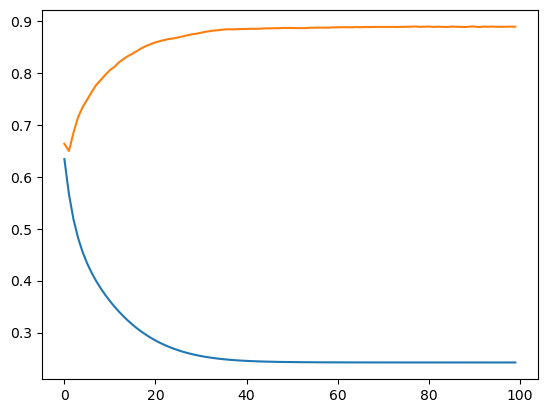

In [39]:
plt.plot(range(0, 100), history_1.history['loss'], label= 'Training loss Value')
plt.plot(range(0, 100), history_1.history['accuracy'], label= 'Training accuracy')


## Confusion Matrix

In [49]:
y_pred = model_1.predict(X_test)
tf.round(y_pred).shape, y_test.shape

63/63 [==============================] - 0s 357us/step


(TensorShape([2000, 1]), (2000,))

In [48]:
tf.round(y_pred[0]), y_test[0]

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, 1)

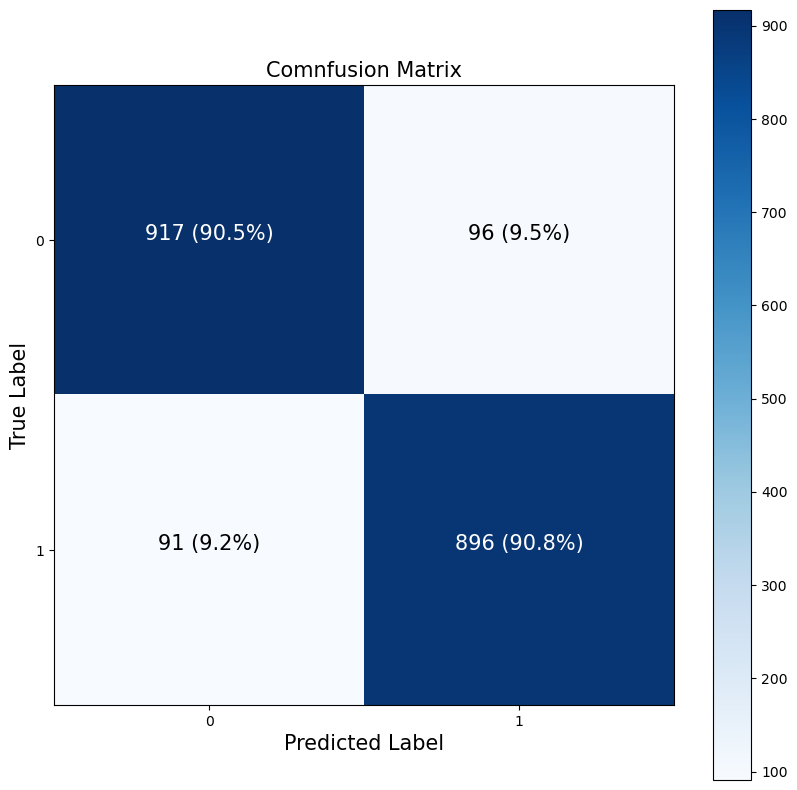

In [54]:
plot_confusion_matrix(y_test, tf.round(y_pred))

**Note**: Eventhough the training and testing accuracy is good but according to the decision boundary the model is not performing well

# Imporiving the model

Since our model is not performing in a non linear manner, we need to add some non linear activation function into our model.

Other improvements:
* Changing the learning rate
* Adding more layers
* Train for longer time

In [56]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 0s 355us/step - loss: 0.5754 - accuracy: 0.8285
Epoch 2/100
250/250 [==============================] - 0s 294us/step - loss: 0.4231 - accuracy: 0.8395
Epoch 3/100
250/250 [==============================] - 0s 297us/step - loss: 0.3280 - accuracy: 0.8543
Epoch 4/100
250/250 [==============================] - 0s 299us/step - loss: 0.2847 - accuracy: 0.8681
Epoch 5/100
250/250 [==============================] - 0s 304us/step - loss: 0.2596 - accuracy: 0.8805
Epoch 6/100
250/250 [==============================] - 0s 296us/step - loss: 0.2430 - accuracy: 0.8880
Epoch 7/100
250/250 [==============================] - 0s 298us/step - loss: 0.2322 - accuracy: 0.8921
Epoch 8/100
250/250 [==============================] - 0s 383us/step - loss: 0.2249 - accuracy: 0.8925
Epoch 9/100
250/250 [==============================] - 0s 305us/step - loss: 0.2198 - accuracy: 0.8925
Epoch 10/100
250/250 [==============================] - 0s 305us/step - l

319/319 [==============================] - 0s 248us/step
doing binary classification


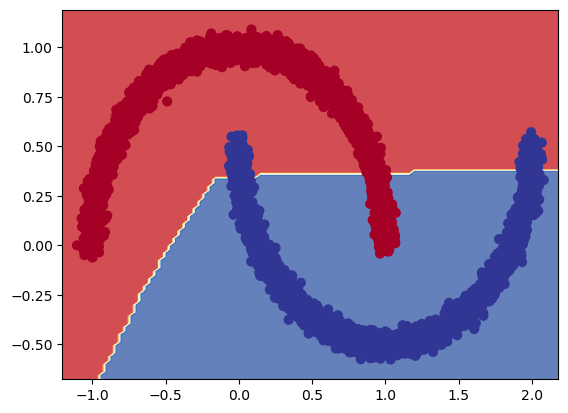

In [57]:
plot_decision_boundary(model= model_2,
                       X= X_train, 
                       y= y_train)

Add one more layer

In [59]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_3.fit(X_train, y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 0s 387us/step - loss: 0.5943 - accuracy: 0.6865
Epoch 2/100
250/250 [==============================] - 0s 307us/step - loss: 0.3592 - accuracy: 0.8601
Epoch 3/100
250/250 [==============================] - 0s 302us/step - loss: 0.2766 - accuracy: 0.8788
Epoch 4/100
250/250 [==============================] - 0s 306us/step - loss: 0.2493 - accuracy: 0.8881
Epoch 5/100
250/250 [==============================] - 0s 312us/step - loss: 0.2379 - accuracy: 0.8898
Epoch 6/100
250/250 [==============================] - 0s 320us/step - loss: 0.2308 - accuracy: 0.8905
Epoch 7/100
250/250 [==============================] - 0s 307us/step - loss: 0.2258 - accuracy: 0.8915
Epoch 8/100
250/250 [==============================] - 0s 311us/step - loss: 0.2219 - accuracy: 0.8923
Epoch 9/100
250/250 [==============================] - 0s 312us/step - loss: 0.2195 - accuracy: 0.8899
Epoch 10/100
250/250 [==============================] - 0s 327us/step - l

319/319 [==============================] - 0s 264us/step
doing binary classification


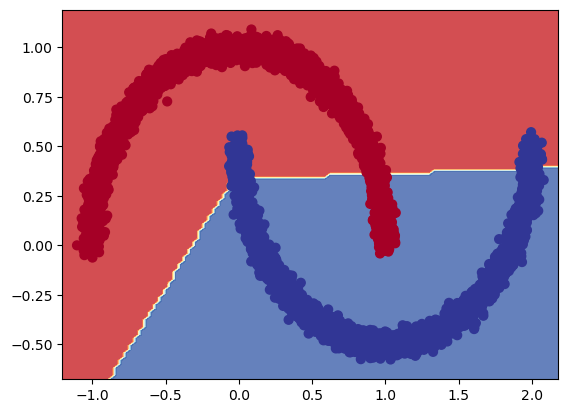

In [60]:
plot_decision_boundary(model_3, X_train, y_train)

Addition of another layer didn't help much to the model therefore removing the layer.

Will other activation function help?

In [97]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs= 100, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 0s 748us/step - loss: 0.5304 - accuracy: 0.8105 - val_loss: 0.4417 - val_accuracy: 0.8215
Epoch 2/100
250/250 [==============================] - 0s 421us/step - loss: 0.4128 - accuracy: 0.8098 - val_loss: 0.3553 - val_accuracy: 0.8450
Epoch 3/100
250/250 [==============================] - 0s 405us/step - loss: 0.3489 - accuracy: 0.8356 - val_loss: 0.2994 - val_accuracy: 0.8720
Epoch 4/100
250/250 [==============================] - 0s 407us/step - loss: 0.3052 - accuracy: 0.8586 - val_loss: 0.2627 - val_accuracy: 0.8875
Epoch 5/100
250/250 [==============================] - 0s 428us/step - loss: 0.2776 - accuracy: 0.8724 - val_loss: 0.2412 - val_accuracy: 0.8960
Epoch 6/100
250/250 [==============================] - 0s 423us/step - loss: 0.2621 - accuracy: 0.8831 - val_loss: 0.2293 - val_accuracy: 0.9015
Epoch 7/100
250/250 [==============================] - 0s 409us/step - loss: 0.2541 - accuracy: 0.8866 - val_loss: 0.2227 - val_ac

319/319 [==============================] - 0s 240us/step
doing binary classification


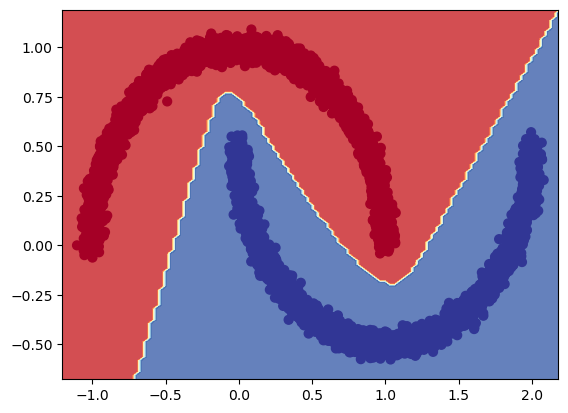

In [66]:
plot_decision_boundary(model_4, X_train, y_train)

The change in activation function helped a lot and is performing very well

Let's evaluate to other metrics also

63/63 [==============================] - 0s 280us/step


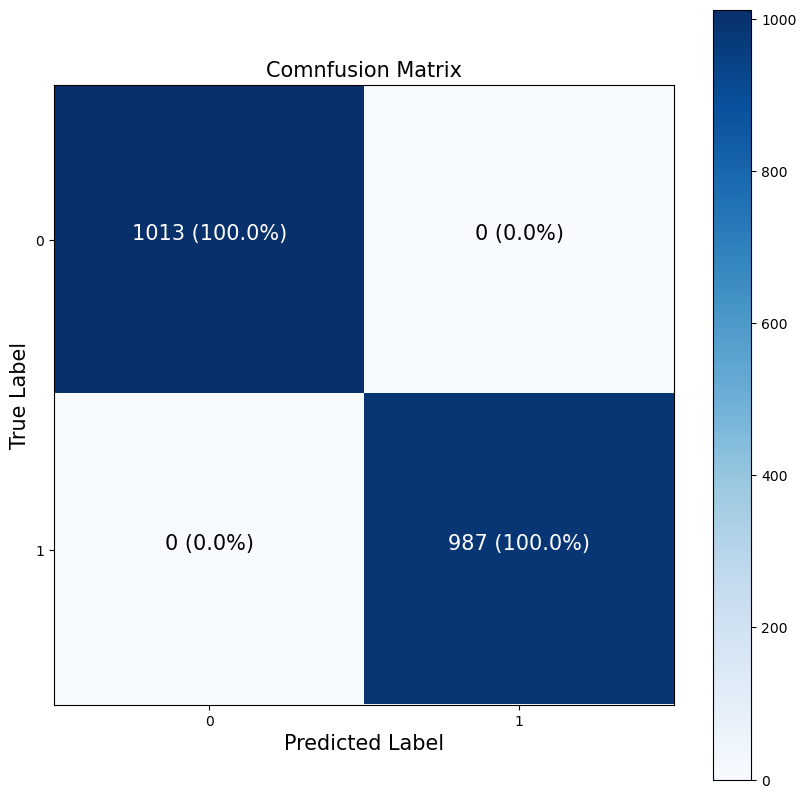

In [67]:
plot_confusion_matrix(y_test, 
                      tf.round(model_4.predict(X_test)))

According to the confusion matrix the model is performing outstanding.

Let's see if we can optimize the model by tweaking the learning rate

<Axes: >

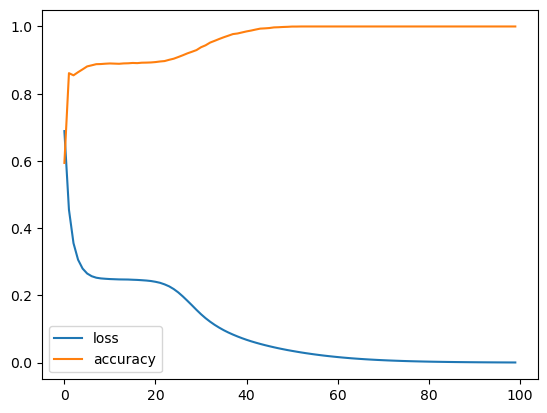

In [73]:
pd.DataFrame(history_4.history).plot()

## Looking for the optimal learning rate

In [79]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_5 = model_5.fit(X_train, y_train, epochs= 100, validation_data= (X_test, y_test), callbacks= [lr_scheduler])

Epoch 1/100


250/250 [==============================] - 0s 744us/step - loss: 0.6030 - accuracy: 0.8480 - val_loss: 0.5853 - val_accuracy: 0.8610 - lr: 1.0000e-04
Epoch 2/100
250/250 [==============================] - 0s 409us/step - loss: 0.5765 - accuracy: 0.8388 - val_loss: 0.5567 - val_accuracy: 0.8550 - lr: 1.1220e-04
Epoch 3/100
250/250 [==============================] - 0s 506us/step - loss: 0.5488 - accuracy: 0.8324 - val_loss: 0.5269 - val_accuracy: 0.8510 - lr: 1.2589e-04
Epoch 4/100
250/250 [==============================] - 0s 410us/step - loss: 0.5205 - accuracy: 0.8286 - val_loss: 0.4966 - val_accuracy: 0.8485 - lr: 1.4125e-04
Epoch 5/100
250/250 [==============================] - 0s 407us/step - loss: 0.4921 - accuracy: 0.8271 - val_loss: 0.4666 - val_accuracy: 0.8480 - lr: 1.5849e-04
Epoch 6/100
250/250 [==============================] - 0s 409us/step - loss: 0.4644 - accuracy: 0.8270 - val_loss: 0.4373 - val_accuracy: 0.8485 - lr: 1.7783e-04
Epoch 7/100
250/250 [===================

Text(0.5, 1.0, 'Learning rate vs Loss Value')

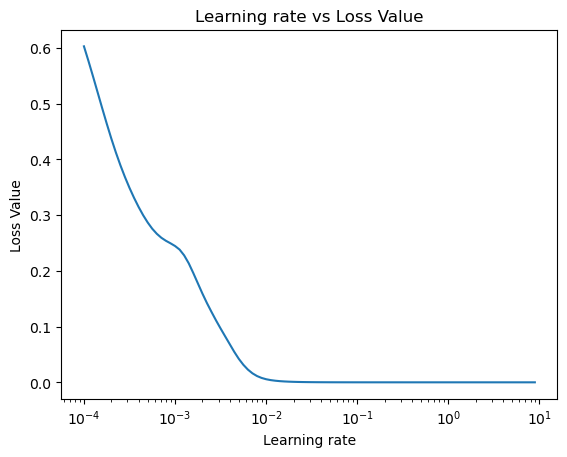

In [80]:
# Plot learning rate vs loss curve
lrs= history_5.history['lr']
plt.semilogx(lrs, history_5.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss Value')
plt.title("Learning rate vs Loss Value")

In [81]:
8e-4, 6e-3

(0.0008, 0.006)

Let's try for the above learning rate value and compare for 20 epochs

In [83]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 8e-4),
                metrics= ['accuracy'])

history_6 = model_6.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20


250/250 [==============================] - 0s 671us/step - loss: 0.5787 - accuracy: 0.7279 - val_loss: 0.5005 - val_accuracy: 0.7785
Epoch 2/20
250/250 [==============================] - 0s 406us/step - loss: 0.4578 - accuracy: 0.7738 - val_loss: 0.3941 - val_accuracy: 0.8145
Epoch 3/20
250/250 [==============================] - 0s 406us/step - loss: 0.3812 - accuracy: 0.8069 - val_loss: 0.3288 - val_accuracy: 0.8460
Epoch 4/20
250/250 [==============================] - 0s 451us/step - loss: 0.3306 - accuracy: 0.8359 - val_loss: 0.2838 - val_accuracy: 0.8705
Epoch 5/20
250/250 [==============================] - 0s 417us/step - loss: 0.2948 - accuracy: 0.8562 - val_loss: 0.2539 - val_accuracy: 0.8850
Epoch 6/20
250/250 [==============================] - 0s 405us/step - loss: 0.2721 - accuracy: 0.8710 - val_loss: 0.2364 - val_accuracy: 0.8945
Epoch 7/20
250/250 [==============================] - 0s 408us/step - loss: 0.2596 - accuracy: 0.8802 - val_loss: 0.2269 - val_accuracy: 0.9005
Epo

319/319 [==============================] - 0s 275us/step
doing binary classification
319/319 [==============================] - 0s 234us/step
doing binary classification


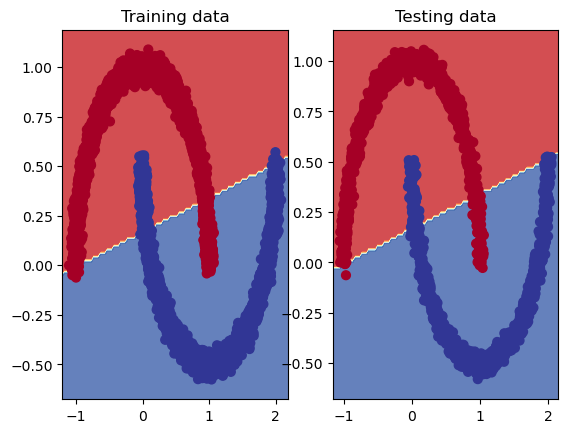

In [85]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_6, X_test, y_test)

63/63 [==============================] - 0s 311us/step


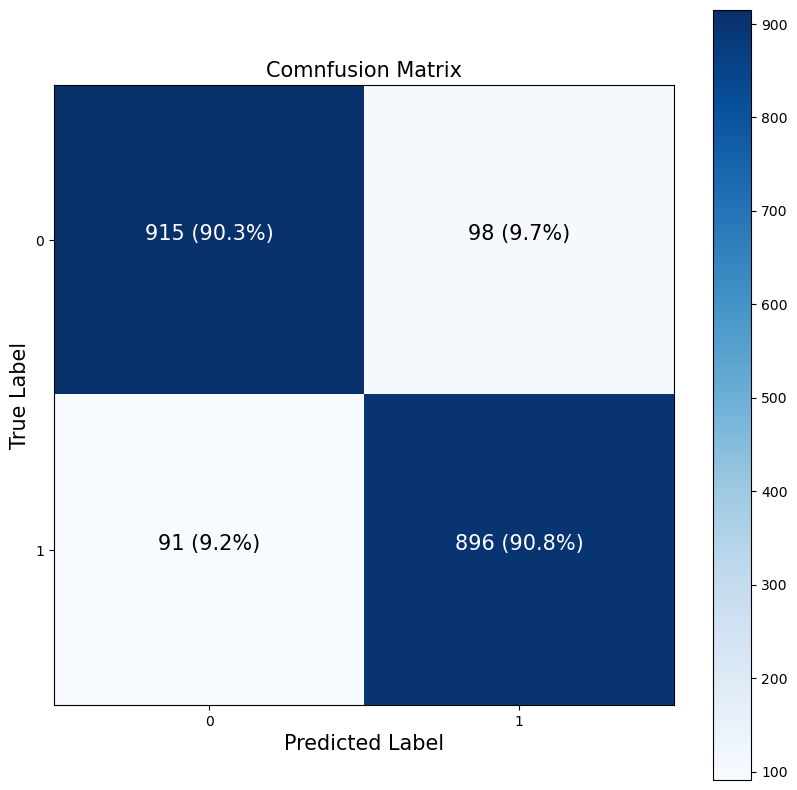

In [86]:
plot_confusion_matrix(y_test, tf.round(model_6.predict(X_test)))

The above learing rate was not at all good enough for faster output. Let's try the other one

In [87]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 6e-3),
                metrics= ['accuracy'])

history_7 = model_7.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 0s 660us/step - loss: 0.3826 - accuracy: 0.8325 - val_loss: 0.2283 - val_accuracy: 0.9030
Epoch 2/20
250/250 [==============================] - 0s 413us/step - loss: 0.2521 - accuracy: 0.8860 - val_loss: 0.2191 - val_accuracy: 0.9025
Epoch 3/20
250/250 [==============================] - 0s 403us/step - loss: 0.2497 - accuracy: 0.8870 - val_loss: 0.2179 - val_accuracy: 0.8990
Epoch 4/20
250/250 [==============================] - 0s 406us/step - loss: 0.2490 - accuracy: 0.8875 - val_loss: 0.2160 - val_accuracy: 0.9005
Epoch 5/20
250/250 [==============================] - 0s 407us/step - loss: 0.2488 - accuracy: 0.8834 - val_loss: 0.2164 - val_accuracy: 0.9035
Epoch 6/20
250/250 [==============================] - 0s 432us/step - loss: 0.2477 - accuracy: 0.8855 - val_loss: 0.2158 - val_accuracy: 0.9040
Epoch 7/20
250/250 [==============================] - 0s 416us/step - loss: 0.2469 - accuracy: 0.8865 - val_loss: 0.2149 - val_accuracy:

319/319 [==============================] - 0s 247us/step
doing binary classification
319/319 [==============================] - 0s 237us/step
doing binary classification


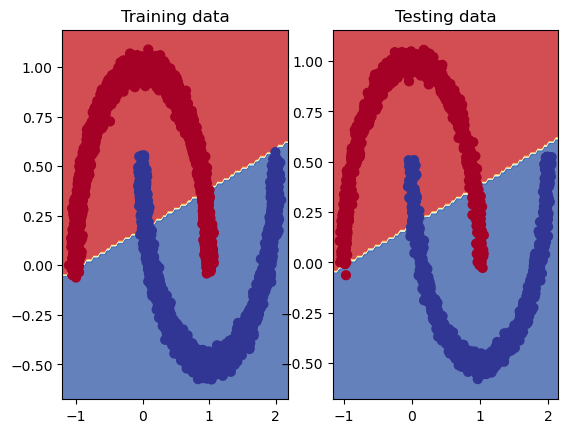

In [88]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_7, X_test, y_test)

63/63 [==============================] - 0s 496us/step


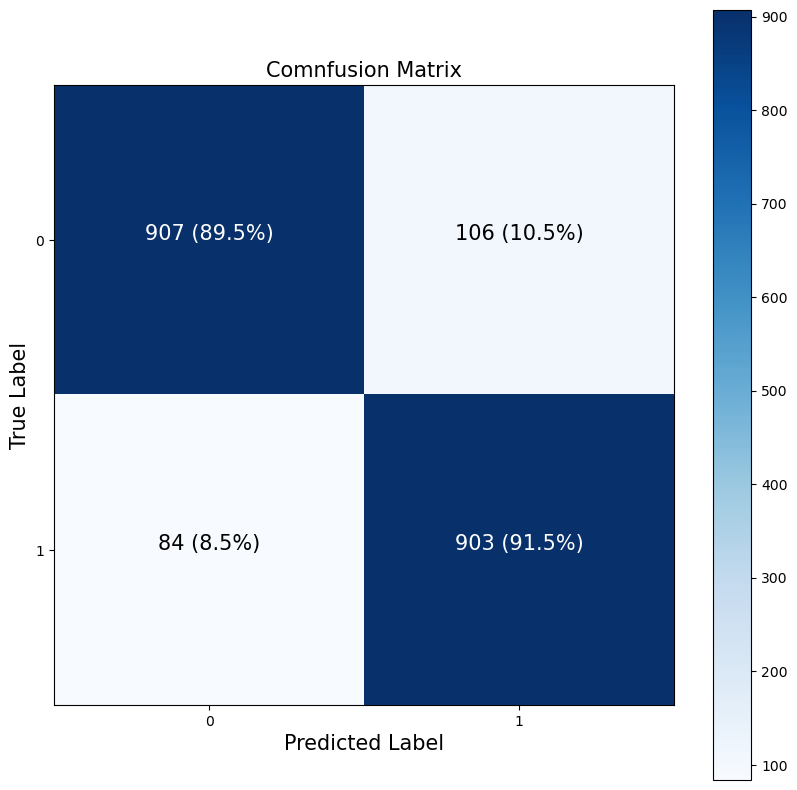

In [90]:
plot_confusion_matrix(y_test, tf.round(model_7.predict(X_test)))

From the above experiments, we can conclude that `model_4` has performed the best

319/319 [==============================] - 0s 259us/step
doing binary classification
319/319 [==============================] - 0s 236us/step
doing binary classification


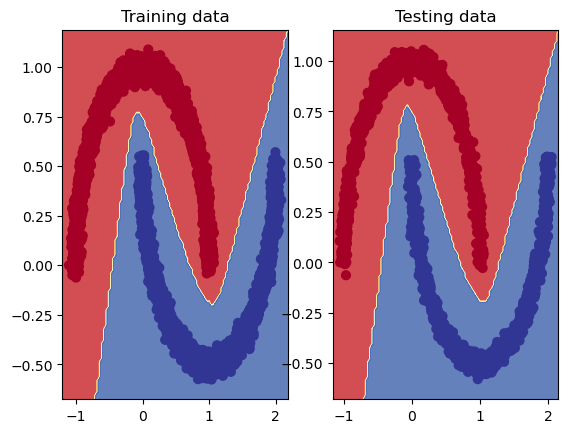

In [92]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_4, X_test, y_test)

63/63 [==============================] - 0s 290us/step


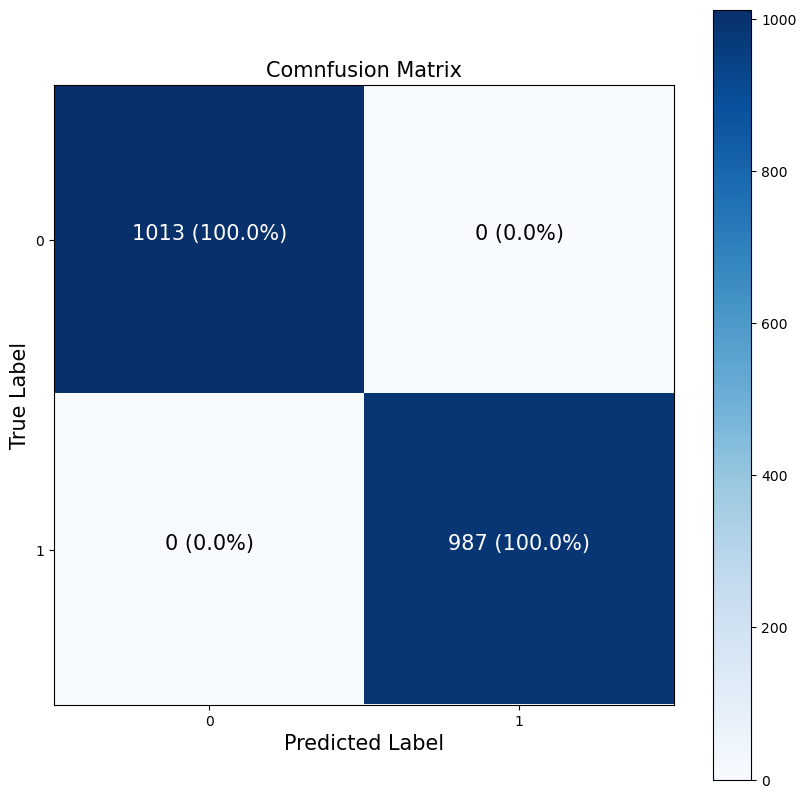

In [93]:
plot_confusion_matrix(y_test, tf.round(model_4.predict(X_test)))

In [99]:
X_test

array([[ 0.8141004 , -0.51346939],
       [ 1.49960073, -0.34049139],
       [-0.9829114 ,  0.24391071],
       ...,
       [ 0.5114129 ,  0.86143247],
       [-0.15628843,  1.00866236],
       [-0.35473776,  0.88803656]])

In [100]:
model_4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 746us/step - loss: 2.9575e-04 - accuracy: 1.0000


[0.00029575254302471876, 1.0]